<a href="https://colab.research.google.com/github/KartonDCP/MathWorks/blob/master/MathModelNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [58]:
#--------------------- Data Preprocessing --------------------#
# Importing and scaling the data
dataset_train = pd.read_csv("Bitcoin_Stock_Price_Trainset.csv")
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/16,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,1/2/16,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,1/3/16,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,1/4/16,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,1/5/16,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...,...
1818,12/27/20,26439.373050,28288.839840,25922.769530,26272.294920,26272.294920,66479895605
1819,12/28/20,26280.822270,27389.111330,26207.640630,27084.808590,27084.808590,49056742893
1820,12/29/20,27081.810550,27370.720700,25987.298830,27362.437500,27362.437500,45265946774
1821,12/30/20,27360.089840,28937.740230,27360.089840,28840.953130,28840.953130,51287442704


In [59]:
# Feature scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.00230534],
       [0.00244233],
       [0.00240567],
       ...,
       [0.93820295],
       [0.9479752 ],
       [1.        ]])

In [60]:
#creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(90,training_set_scaled.size):
    # appending the 60 previous stock prices to the list for i
    # we need to specify the rows and simply pick the first and only column
    X_train.append(training_set_scaled[i-90:i, 0])
    # appending the 60th stock price to the list for i
    y_train.append(training_set_scaled[i, 0])
# transforming pandas lists to numpy arrays required for the RNN
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)

[[0.00230534 0.00244233 0.00240567 ... 0.0021588  0.00208    0.00181767]
 [0.00244233 0.00240567 0.00228216 ... 0.00208    0.00181767 0.00176229]
 [0.00240567 0.00228216 0.00238779 ... 0.00181767 0.00176229 0.00181508]
 ...
 [0.36478732 0.36544407 0.36336591 ... 0.85375456 0.91564269 0.91007491]
 [0.36544407 0.36336591 0.36803461 ... 0.91564269 0.91007491 0.93820295]
 [0.36336591 0.36803461 0.36591355 ... 0.91007491 0.93820295 0.9479752 ]]


In [61]:
# Shaping/adding new dimensions to allow adding more indicators: from 2D to 3D
# 3 input arguments
# batch_size: number of observations
# timesteps: number of columns
# input_dim: number of predictors
X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])
#print(X_train)

In [62]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)

[[  430.721008]
 [  434.622009]
 [  433.578003]
 ...
 [27081.81055 ]
 [27360.08984 ]
 [28841.57422 ]]


In [63]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [64]:
X_train = []
y_train = []

for i in range(90,training_set_scaled.size):
    # appending the 60 previous stock prices to the list for i
    # we need to specify the rows and simply pick the first and only column
    X_train.append(training_set_scaled[i-90:i, 0])
    # appending the 60th stock price to the list for i
    y_train.append(training_set_scaled[i, 0])
# transforming pandas lists to numpy arrays required for the RNN
X_train, y_train = np.array(X_train), np.array(y_train)
#print(X_train)

In [65]:
X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])

In [66]:
regressor = Sequential()

In [67]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))

# adding Dropout regularization layers
# 1 input: amount of neurons to ignore in the layers
regressor.add(Dropout(0.2))

#------------------------------------------------------------------#
# Adding the second LSTM layer
#------------------------------------------------------------------#
# no input shape needed given that that is specified in the previous layer
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#------------------------------------------------------------------#
# Adding the third LSTM layer
#------------------------------------------------------------------#
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#------------------------------------------------------------------#
# Adding the forth LSTM layer
#------------------------------------------------------------------#
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#------------------------------------------------------------------#
# Adding the fifth LSTM layer
#------------------------------------------------------------------#
# note that this is the final LSTM layer, hence we change the binary argument to False
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#------------------------------------------------------------------#
# Adding output layer to the RNN to make a fully connected NN
#------------------------------------------------------------------#
# one dimensional real output
regressor.add(Dense(units = 1))

In [68]:
#--------------------- Compiling the RNN model --------------------#
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#--------------------- Training RNN model --------------------#
#connecting the built regressor to the training model
regressor.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
55/55 [==============================] - 15s 106ms/step - loss: 0.0106
Epoch 2/120
55/55 [==============================] - 6s 106ms/step - loss: 0.0032
Epoch 3/120
55/55 [==============================] - 6s 106ms/step - loss: 0.0031
Epoch 4/120
55/55 [==============================] - 6s 108ms/step - loss: 0.0026
Epoch 5/120
55/55 [==============================] - 6s 107ms/step - loss: 0.0026
Epoch 6/120
55/55 [==============================] - 6s 107ms/step - loss: 0.0019
Epoch 7/120
55/55 [==============================] - 6s 107ms/step - loss: 0.0019
Epoch 8/120
55/55 [==============================] - 6s 106ms/step - loss: 0.0018
Epoch 9/120
55/55 [==============================] - 6s 107ms/step - loss: 0.0022
Epoch 10/120
55/55 [==============================] - 6s 108ms/step - loss: 0.0019
Epoch 11/120
55/55 [==============================] - 6s 108ms/step - loss: 0.0014
Epoch 12/120
55/55 [==============================] - 6s 107ms/step - loss: 0.0014
Epoch 13/120

In [69]:
dataset_test = pd.read_csv("Bitcoin_Stock_Price_Testset.csv")
# actual stock prices
real_stock_price = dataset_test.iloc[:,1:2].values
# predicting the stock prices using X_test
# we need the original training data (vertical concatination 0, horizontal 1)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print(real_stock_price)

[[28994.00977]
 [29376.45508]
 [32129.4082 ]
 [32810.94922]
 [31977.04102]
 [34013.61328]
 [36833.875  ]
 [39381.76563]
 [40788.64063]
 [40254.21875]
 [38346.53125]
 [35516.35938]
 [33915.12109]
 [37325.10938]
 [39156.70703]
 [36821.64844]
 [36163.64844]
 [35792.23828]
 [36642.23438]
 [36050.11328]
 [35549.39844]
 [30817.625  ]
 [32985.75781]
 [32064.37695]
 [32285.79883]
 [32358.61328]
 [32564.0293 ]
 [30441.04102]
 [34318.67188]
 [34295.93359]
 [34270.87891]
 [33114.57813]
 [33533.19922]
 [35510.82031]
 [37475.10547]
 [36931.54688]
 [38138.38672]
 [39250.19141]
 [38886.82813]
 [46184.99219]
 [46469.76172]
 [44898.71094]
 [47877.03516]
 [47491.20313]
 [47114.50781]
 [48696.53516]
 [47944.45703]
 [49207.27734]
 [52140.97266]
 [51675.98047]
 [55887.33594]
 [56068.56641]
 [57532.73828]
 [54204.92969]
 [48835.08594]
 [49709.08203]
 [47180.46484]
 [46344.77344]
 [46194.01563]
 [        nan]]


In [70]:
print("First Financial day in 2021, when testing period begins",len(dataset_total)- len(dataset_test))
print("First Financial day in 2021 minus 60 days",len(dataset_total)- len(dataset_test) - 90)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values

# reshaping,normalizing the inputs
inputs = inputs.reshape(-1,1)
# no longer fitting but just transforming
inputs = sc.transform(inputs)


First Financial day in 2021, when testing period begins 1823
First Financial day in 2021 minus 60 days 1733


In [71]:
X_test = []
for i in range(90,inputs.size):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)
#adding extra dimension
X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])

#obtaining predicted values
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

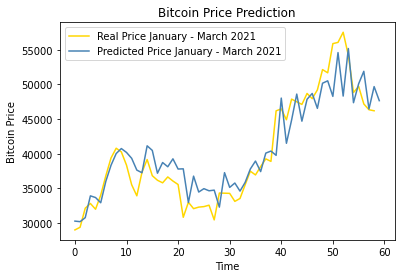

In [72]:
#--------------------- Visualizing the RNN model results--------------------#
plt.plot(real_stock_price, color = '#ffd700', label = "Real Price January - March 2021")
plt.plot(predicted_stock_price, color = '#4782B4', label = "Predicted Price January - March 2021")
plt.title("Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()